## Mod 5 Online Shoppers Intent Project

## Contents:


1. 2. 3. 4. 5. 6. 7.

## 1. Business Case:


## 2. Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
%matplotlib inline


from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
              
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz

from IPython.display import Image  
from pydotplus import graph_from_dot_data

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve



from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier



from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')
df.shape

(12330, 18)

## 3. Data Scrubbing

In [4]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df.duplicated().sum()

125

Our Data Looks pretty clean without any nulls and very small number of duplicates which highly likely to be by chance.

## 4. Exploration

### 4.1 Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

### 4.2 Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.
"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

## 4.3 Screen for Categorical variables:

In [7]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
# Here we are checking the ratio of unique values to the total number count for each column
df.nunique()/df.count()
# proportions of nuniques to total counts < 0.05 suggest categorical variables

Administrative             0.002190
Administrative_Duration    0.270479
Informational              0.001379
Informational_Duration     0.102028
ProductRelated             0.025223
ProductRelated_Duration    0.774615
BounceRates                0.151825
ExitRates                  0.387429
PageValues                 0.219303
SpecialDay                 0.000487
Month                      0.000811
OperatingSystems           0.000649
Browser                    0.001054
Region                     0.000730
TrafficType                0.001622
VisitorType                0.000243
Weekend                    0.000162
Revenue                    0.000162
dtype: float64

In [9]:
# Subset categorical and continuous features from dataframe for visualisations:
df_cont = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'ExitRates', 'PageValues', 'BounceRates']]
df_cat = df.drop(df_cont.columns, axis=1)

## 5. Baseline Model

### 5.1 Decision Tree

In [10]:
# Feature and Target subsetting:
X = df.drop(columns=['Revenue'], axis =1)
y = df['Revenue']

In [11]:
# One-hot encode the categorical variables in the training data and show the resulting DataFrame with proper column names
ohe = OneHotEncoder()
# subset continuous and categorical variables:
X_cont = X[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'ExitRates', 'PageValues', 'BounceRates']]
X_cat = X.drop(df_cont.columns, axis=1)


#Fit transform the variables and place them in a dataframe
encoded_vars = ohe.fit_transform(X_cat).toarray()
ohe_df = pd.DataFrame(encoded_vars, columns=ohe.get_feature_names(X_cat.columns))
print(ohe_df.shape)

scaler = StandardScaler()
scaled_num = pd.DataFrame(scaler.fit_transform(X_cont), columns= X_cont.columns)
print(scaled_num.shape)

(12330, 426)
(12330, 6)


In [12]:
# reset index and make a copy of continuous dataframe.
X = X_cont.copy()
X.reset_index(drop=True, inplace=True)

# Concat into continuous and encoded categoricals into one training dataset:
X = pd.concat([scaled_num, ohe_df], axis=1)
X.shape

(12330, 432)

In [13]:
#train_test_split and create a global seed
seed=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = seed)

In [14]:
# #train_test_split again to create train and validation 

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state = seed)

### 5.2 Decision Tree fit

In [15]:
# Decision tree classifier fit 
clf = DecisionTreeClassifier(random_state = seed, criterion='entropy')

clf.fit(X_train, y_train)
#KFold cross validator instantiated:
cv = KFold(n_splits=5, random_state=seed)

# Use Crossvalidation to obtain Performance metrics: F1 Score and Accuracy
F1_score = round(np.mean(cross_val_score(clf, X_train, y_train, cv=cv, scoring='f1')), 4)
Acc_score = round(np.mean(cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')), 4)
roc_AUC_score = round(np.mean(cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')), 4)
#Print F1 and Accuracy and ROC_AUC score for crossvalidation baseline decision tree
F1_score, Acc_score, roc_AUC_score

(0.5552, 0.8651, 0.7381)

## 6.0 Exploring Potential Improvements on Baseline Model

In [16]:
# Gini impurity Decision tree classifier fit 
clf1 = DecisionTreeClassifier(random_state = seed, criterion='gini')
clf1.fit(X_train, y_train)

# Use Crossvalidation to obtain Performance metrics: F1 Score and Accuracy
F1_score = round(np.mean(cross_val_score(clf1, X_train, y_train, cv=cv, scoring='f1')), 4)
Acc_score = round(np.mean(cross_val_score(clf1, X_train, y_train, cv=cv, scoring='accuracy')), 4)
roc_AUC_score = round(np.mean(cross_val_score(clf1, X_train, y_train, cv=cv, scoring='roc_auc')), 4)

#Print F1 and Accuracy and ROC_AUC score for crossvalidation baseline decision tree
F1_score, Acc_score, roc_AUC_score

(0.5659, 0.8694, 0.7428)

## 6.2 Grid Search CV for Decision tree with Entropy impurity

In [17]:
# Entropy impurity performed better. Let's implement hyperparameter tuning with combinatoric grid searching.

#initial Param grid:

dt_param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [10, 500, 1000]
}


#insantiate the GridSearchCV
dt_grid_search = GridSearchCV(clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy'],
                         '

In [18]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])


print(f"Mean Training Score: {dt_gs_training_score :.2%}")

# Print best parameter combination found during grid search:
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 90.32%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 10}

In [19]:
# Primary Param grid prediction scores: (Accuracy, Precision, Recall and F1)
predictions = dt_grid_search.best_estimator_.predict(X_train)
accuracy_score1 = accuracy_score(y_train, predictions)
recall_score1 = recall_score(y_train, predictions)
precision_score1 = precision_score(y_train, predictions)
F1_score1 = f1_score(y_train, predictions)
print(f'Recall Score:{recall_score1}\nPrecision Score:{precision_score1}\nAccuracy Score{accuracy_score1}\nF1 Score {F1_score1}')

Recall Score:0.6239144956579826
Precision Score:0.6949404761904762
Accuracy Score0.9013584752635847
F1 Score 0.6575149595212954


In [20]:
# Secondary Param_Grid:

dt_param_grid1 = {
    'criterion': ['entropy'],
    'max_depth': [3],
    'min_samples_split': [2,3,5,7,9]
}
dt_grid_search1 = GridSearchCV(clf, dt_param_grid1, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy'], 'max_depth': [3],
        

In [21]:
# Secondary Param Grid Mean train score 
dt_gs_training_score1 = np.mean(dt_grid_search1.cv_results_['mean_train_score'])

print(f"Mean Training Score: {dt_gs_training_score1 :.2%}")

# Secondary Param grid best combinations:
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search1.best_params_

Mean Training Score: 90.04%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [22]:
#Predictions for secondary parameter grid and its related Recall, precision accuracy and F1 scores:
predictions = dt_grid_search1.best_estimator_.predict(X_train)
acc_score = accuracy_score(y_train, predictions)
rec_score = recall_score(y_train, predictions)
prec_score = precision_score(y_train, predictions)
F1_score = f1_score(y_train, predictions)
print(f'Recall Score:{rec_score}\nPrecision Score:{prec_score}\nAccuracy Score{acc_score}\nF1 Score {F1_score}')

Recall Score:0.6239144956579826
Precision Score:0.6949404761904762
Accuracy Score0.9013584752635847
F1 Score 0.6575149595212954


## 6.3 Logistic Regression Classifier

In [23]:
param_grid = [{'C': np.logspace(0,4,10), 'penalty': ['l1','l2']}]
log_clf = LogisticRegression(class_weight='balanced')

In [24]:
grid_logistic = GridSearchCV(log_clf, param_grid, cv=5, scoring='roc_auc', return_train_score=True)

In [25]:
grid_logistic.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
    

In [26]:
grid_logistic.best_params_
best_log = grid_logistic.best_estimator_
best_log

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_log_pred_proba = cross_val_predict(best_log, X_train, y_train,method='predict_proba', cv=3)[:,1]

In [28]:
roc_auc_log = roc_auc_score(y_train, y_log_pred_proba)
print(roc_auc_log)

0.891678340945466


## 6.4 Ensemble Methods - Random Forests

In [29]:
# Instantiate Random Forest and cross validate fit with the training data:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

rf_clf.fit(X_train, y_train)
#print resulting mean score.
print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score : .2%}")

#Predictions and scores for out-of-box Random forest:
predictions = dt_grid_search1.best_estimator_.predict(X_train)
acc_score = accuracy_score(y_train, predictions)
rec_score = recall_score(y_train, predictions)
prec_score = precision_score(y_train, predictions)
F1_score = f1_score(y_train, predictions)
print(f'Recall Score:{rec_score}\nPrecision Score:{prec_score}\nAccuracy Score{acc_score}\nF1 Score {F1_score}')

Mean Cross Validation Score for Random Forest Classifier:  89.24%
Recall Score:0.6239144956579826
Precision Score:0.6949404761904762
Accuracy Score0.9013584752635847
F1 Score 0.6575149595212954


In [30]:
#Random Forest Param Grid 1:

# Create the Random_Grid
random_grid = {'bootstrap': [True, False],
             'max_depth': [10, 20, 30, 40, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [100, 200]
              }

Below we run a RandomSearchCV model and got the parameters of: 

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}
 
Although it takes around 5 hours, uncomment the code below if you would like to.

In [31]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# Will search across 1000 different combinations, and use all available cores
#### rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 1000, cv = 3, verbose=2, scoring='roc_auc', random_state=seed, n_jobs = -1)
# Fit the random search model
#### rf_random.fit(X_train, y_train)

In [32]:
# GridSearchCV Param_grid Based on Random Search results:


rf_param_grid = {
    'bootstrap': [False],
    'max_depth': [20, 30, 40, 50],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [200, 300, 400]
}

In [33]:
#Instantiate and fit Grid Search 1
grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, n_jobs= -1, scoring='roc_auc', verbose=2, cv=3)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  3.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [34]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 4,
 'min_samples_leaf': 3,
 'n_estimators': 400}

In [35]:
grid_search.best_score_

0.8946119800255464

In [36]:
# secondary GridSearchCV:


rf_param_grid = {
    'criterion': ['entropy'],
    'bootstrap': [False],
    'max_depth': [40, 45, 50],
    'max_features': [4, 5],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [300, 350]
}

In [37]:
#Instantiate and fit Grid Search 2
grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, n_jobs= -1, scoring='roc_auc', verbose=2, cv=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 16.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [38]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 5,
 'min_samples_leaf': 1,
 'n_estimators': 300}

In [39]:
grid_search.best_score_

0.9129055289975193

In [40]:
# Tertiary GridSearchCV:


rf_param_grid = {
    'criterion': ['entropy'],
    'bootstrap': [False],
    'max_depth': [40],
    'max_features': [5, 6, 7],
    'min_samples_leaf': [1],
    'n_estimators': [350, 400, 450]
}

In [41]:
#Instantiate and fit Grid Search 3
grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, n_jobs= -1, scoring='roc_auc', verbose=2, cv=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [42]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 7,
 'min_samples_leaf': 1,
 'n_estimators': 350}

In [43]:
grid_search.best_score_

0.9155667615857986

In [44]:
# quaternary GridSearchCv
rf_param_grid = {
    'criterion': ['entropy'],
    'bootstrap': [False],
    'max_depth': [40],
    'max_features': [10, 50, 200, 400],
    'min_samples_leaf': [1],
    'n_estimators': [350]
}
#Instantiate and fit Grid Search 2
grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, n_jobs= -1, scoring='roc_auc', verbose=2, cv=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 25.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 25.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [45]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 50,
 'min_samples_leaf': 1,
 'n_estimators': 350}

In [46]:
grid_search.best_score_

0.9262389964583164

In [47]:
# Fifth GridSearchCv
rf_param_grid = {
    'criterion': ['entropy'],
    'bootstrap': [False],
    'max_depth': [40],
    'max_features': [30, 50,70, 90],
    'min_samples_leaf': [1],
    'n_estimators': [350]
}
#Instantiate and fit Grid Search 2
grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, n_jobs= -1, scoring='roc_auc', verbose=2, cv=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [48]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 90,
 'min_samples_leaf': 1,
 'n_estimators': 350}

In [49]:
grid_search.best_score_

0.9276548794972519

In [50]:
# sixth GridSearchCv
rf_param_grid = {
    'criterion': ['entropy'],
    'bootstrap': [False],
    'max_depth': [40],
    'max_features': [65, 70,75],
    'min_samples_leaf': [1],
    'n_estimators': [350]
}
#Instantiate and fit Grid Search 2
grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, n_jobs= -1, scoring='roc_auc', verbose=2, cv=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  1.5min remaining:   25.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [51]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 70,
 'min_samples_leaf': 1,
 'n_estimators': 350}

In [52]:
grid_search.best_score_

0.9277352362188224

## 7.0 Threshold Selection

In [53]:
# Predict probabilities from optimal model:

optimal_model = grid_search.best_estimator_

probas = optimal_model.predict_proba(X_train)

y_prob = cross_val_predict(optimal_model, X_train, y_train,method='predict_proba', cv=3)[:,1]

In [54]:
# Obtain our False positive rate and True positive rate as wella s our Thresholds:
fpr,tpr,threshold = roc_curve(y_train, y_prob)

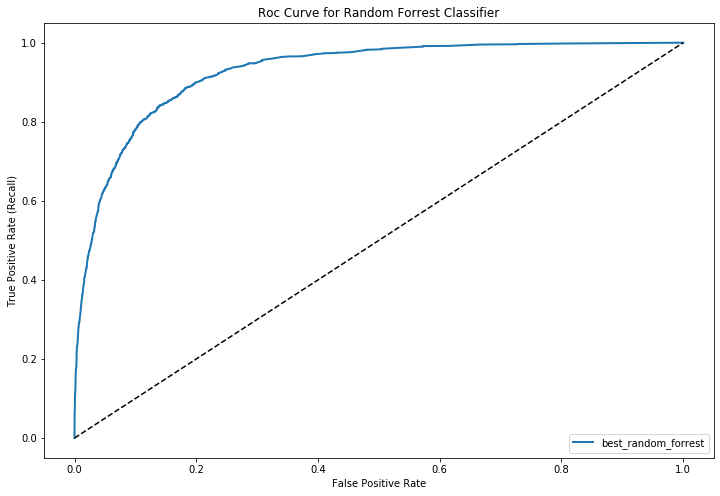

In [55]:
def plot_roc_curve(fpr, tpr, label=None):
    fig = plt.figure(figsize=(12,8))
    plt.plot(fpr,tpr,linewidth= 2, label=label)
    plt.plot([0,1], [0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Roc Curve for Random Forrest Classifier')
    plt.legend(loc=4)

plot_roc_curve(fpr, tpr, label='best_random_forrest')
plt.show()

In [56]:
# obtain confusion matrix values (TP, FP, TN, FN):
tn, fp, fn, tp = confusion_matrix(y_train, y_train_rf_predict).ravel()

# Define Costs for Threshold Object Function and m values:

cfp = 150
ctn = 0
cfn = 200
ctp = -50

# Define Prevalence (actual positives/all positives)
prevalence = (tp + fn)/(tp+tn+fn+fp)

#Metz's m:
m = ((1 - prevalence)/prevalence)*((cfp - ctn)/(cfn - ctp))

# Iterate through thresholds from roc_curve to calculate best objective funtion (fm)
best_threshold = 0
diff = 0
for i in range(len(threshold)):
    temp = tpr[i]-(m*fpr[i])
    if temp>diff:
        diff = temp
        best_threshold = threshold[i]
print(best_threshold)

NameError: name 'y_train_rf_predict' is not defined

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    fig = plt.figure(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precisions')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Thresholds')
    plt.ylabel("Score")
    plt.title('Precision/Recall Trade-off')
    plt.legend(loc='center right')

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_prob)

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.axvline(best_threshold, c='red', linestyle='--', label='threshold', ymax=0.95, ymin=0.05)
plt.legend()
plt.show()

As we see from the graph our threshold is very close to the point where Precisions and Recall both still high but start dropping.

## 8. Testing our Model

In [ ]:
y_probs = optimal_model.predict_proba(X_test)[:,1]
predictions = (y_probs > best_threshold)
cm  = confusion_matrix(y_test, predictions)

In [ ]:
cm_plot = plot_confusion_matrix(optimal_model,X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(cm_plot.confusion_matrix)

Our model performs okay on test data.

In [ ]:
prec = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print(f'Precision score: {prec}\nRecall score: {recall}')